<a href="https://colab.research.google.com/github/Schimidel/UGRH-s-PrecipitacaoeTemperatura/blob/main/Proje%C3%A7%C3%B5es_Futuras_Temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture

!pip install -U xarray[complete] # reinstala todo o xarray (útil nessa versão do colab por conta do cftime)

!pip install cartopy # Instala o cartopy

#Análise Geral

In [ ]:
#Importa as bibliotecas
import xarray as xr #Biblioteca para netcdf
import numpy as np
import requests #Biblioteca para fazer download direto do link htlm
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.crs as ccrs #Biblioteca de criação de mapas
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from scipy import stats
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
output_dir = '/content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados'

#Arquivos históricos
CCSM4 = xr.open_dataset(f'{output_dir}/CCSM4_tas.nc')
ACCESS1_3 = xr.open_dataset(f'{output_dir}/ACCESS1-3_tas.nc')
HadGEM2_ES = xr.open_dataset(f'{output_dir}/HadGEM2-ES_tas.nc')

#Arquivos rcp4.5
CCSM4_rcp45 = xr.open_dataset(f'{output_dir}/RCP45-CCSM4_tas.nc')
ACCESS1_3_rcp45 = xr.open_dataset(f'{output_dir}/RCP45-ACCESS1-3_tas.nc')
HadGEM2_ES_rcp45 = xr.open_dataset(f'{output_dir}/RCP45-HadGEM2-ES_tas.nc')

#Arquivos rcp8.5
CCSM4_rcp85 = xr.open_dataset(f'{output_dir}/RCP85-CCSM4_tas.nc')
ACCESS1_3_rcp85 = xr.open_dataset(f'{output_dir}/RCP85-ACCESS1-3_tas.nc')
HadGEM2_ES_rcp85 = xr.open_dataset(f'{output_dir}/RCP85-HadGEM2-ES_tas.nc')

In [ ]:
# Média anual para cada ano
CCSM4_yrmean = CCSM4.groupby('time.year').mean('time')
ACCESS1_3_yrmean = ACCESS1_3.groupby('time.year').mean('time')
HadGEM2_ES_yrmean = HadGEM2_ES.groupby('time.year').mean('time')

CCSM4_rcp45_yrmean = CCSM4_rcp45.groupby('time.year').mean('time')
ACCESS1_3_rcp45_yrmean = ACCESS1_3_rcp45.groupby('time.year').mean('time')
HadGEM2_ES_rcp45_yrmean = HadGEM2_ES_rcp45.groupby('time.year').mean('time')

CCSM4_rcp85_yrmean = CCSM4_rcp85.groupby('time.year').mean('time')
ACCESS1_3_rcp85_yrmean = ACCESS1_3_rcp85.groupby('time.year').mean('time')
HadGEM2_ES_rcp85_yrmean = HadGEM2_ES_rcp85.groupby('time.year').mean('time')

In [ ]:
#Calcula a média climátológica definida para 30 anos.
mean_CCSM4 = CCSM4_yrmean.sel(year=slice("1975", "2004")).mean(dim='year')
mean_ACCESS1_3 = ACCESS1_3_yrmean.sel(year=slice("1975", "2004")).mean(dim='year')
mean_HadGEM2_ES = HadGEM2_ES_yrmean.sel(year=slice("1975", "2004")).mean(dim='year')

In [ ]:
#Calcula as anomalias
anom_CCSM4 = CCSM4_yrmean - mean_CCSM4
anom_ACCESS1_3 = ACCESS1_3_yrmean- mean_ACCESS1_3
anom_HadGEM2_ES = HadGEM2_ES_yrmean - mean_HadGEM2_ES

anom_CCSM4_rcp45 = CCSM4_rcp45_yrmean - mean_CCSM4
anom_ACCESS1_3_rcp45 = ACCESS1_3_rcp45_yrmean - mean_ACCESS1_3
anom_HadGEM2_ES_rcp45 = HadGEM2_ES_rcp45_yrmean - mean_HadGEM2_ES

anom_CCSM4_rcp85 = CCSM4_rcp85_yrmean - mean_CCSM4
anom_ACCESS1_3_rcp85 = ACCESS1_3_rcp85_yrmean - mean_ACCESS1_3
anom_HadGEM2_ES_rcp85 = HadGEM2_ES_rcp85_yrmean - mean_HadGEM2_ES

In [ ]:
#Seleciona só até 2004 os dados historicos, pois eles vão até 2005-12 e os dados do rcp85 começam em 2005-01
anom_CCSM4 = anom_CCSM4.sel(year=slice("1850", "2004"))
anom_ACCESS1_3 = anom_ACCESS1_3.sel(year=slice("1850", "2004"))
anom_HadGEM2_ES = anom_HadGEM2_ES.sel(year=slice("1850", "2004"))

anom_CCSM4_rcp45 = anom_CCSM4_rcp45.sel(year=slice("2005", "2100"))
anom_ACCESS1_3_rcp45 = anom_ACCESS1_3_rcp45.sel(year=slice("2005", "2100"))
anom_HadGEM2_ES_rcp45 = anom_HadGEM2_ES_rcp45.sel(year=slice("2005", "2100"))

anom_CCSM4_rcp85 = anom_CCSM4_rcp85.sel(year=slice("2005", "2100"))
anom_ACCESS1_3_rcp85 = anom_ACCESS1_3_rcp85.sel(year=slice("2005", "2100"))
anom_HadGEM2_ES_rcp85 = anom_HadGEM2_ES_rcp85.sel(year=slice("2005", "2100"))

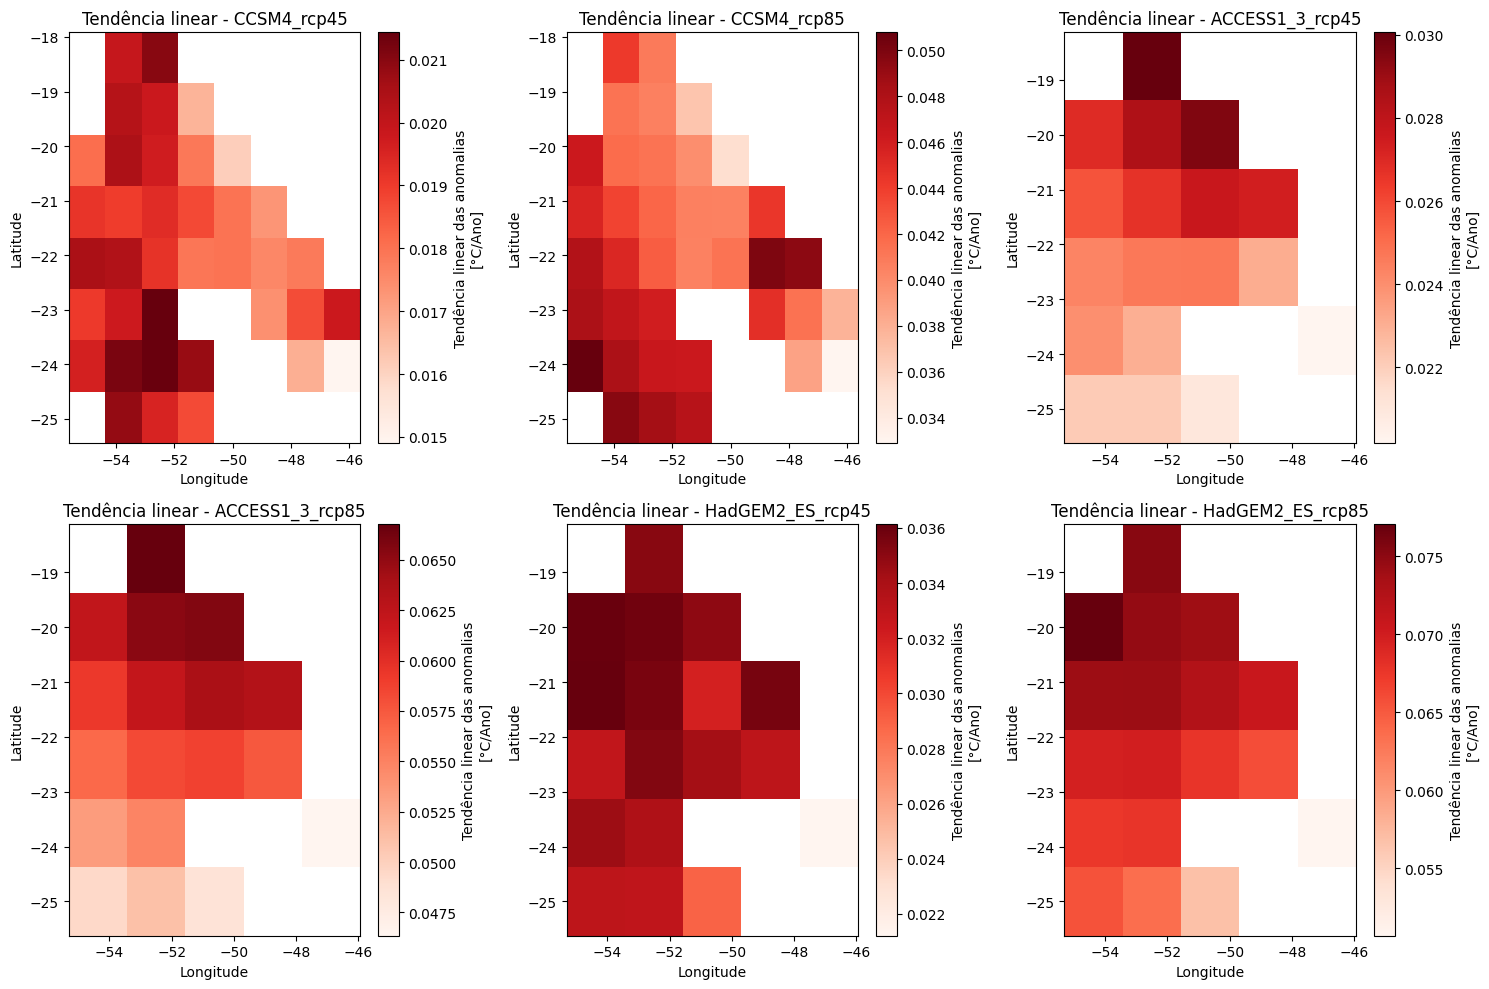

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Suponha que você tenha vários xarrays de anomalias, por exemplo:
anom_datasets = {
    "CCSM4_rcp45": anom_CCSM4_rcp45,
    "CCSM4_rcp85": anom_CCSM4_rcp85,
    "ACCESS1_3_rcp45": anom_ACCESS1_3_rcp45,
    "ACCESS1_3_rcp85": anom_ACCESS1_3_rcp85,
    "HadGEM2_ES_rcp45": anom_HadGEM2_ES_rcp45,
    "HadGEM2_ES_rcp85": anom_HadGEM2_ES_rcp85,
    # Adicione outros conjuntos de dados conforme necessário
}

# Cria uma função para calcular a tendência linear
def calc_trend(x):
    # Retorna os coeficientes da regressão linear (slope e intercept)
    # np.polyfit retorna [slope, intercept]
    return np.polyfit(np.arange(len(x)), x, 1)[0]

# Configuração da grade de subplots
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, (name, anom) in enumerate(anom_datasets.items()):
    da = anom['tas']  # substitua 'tas' pelo nome real da variável se for diferente

    # Calcula a tendência linear
    trend = xr.apply_ufunc(
        calc_trend,
        da,
        vectorize=True,
        input_core_dims=[['year']],
        output_core_dims=[[]],
        dask='parallelized',
        output_dtypes=[da.dtype]
    )

    # Adiciona atributos ao DataArray de tendência
    trend.attrs['units'] = '°C/Ano'
    trend.attrs['long_name'] = 'Tendência linear das anomalias'

    # Calcula a posição do subplot na grade
    row = idx // num_cols
    col = idx % num_cols

    # Plotar a tendência espacial no subplot correspondente
    trend.plot(ax=axes[row, col], cmap='Reds')
    axes[row, col].set_title(f'Tendência linear - {name}')
    axes[row, col].set_xlabel('Longitude')
    axes[row, col].set_ylabel('Latitude')

# Ajusta automaticamente o layout dos subplots
plt.tight_layout()
plt.show()

In [ ]:
#Médias espaciais das anomalias
tas_CCSM4 = anom_CCSM4.mean(dim=['latitude', 'longitude'])
tas_ACCESS1_3 = anom_ACCESS1_3.mean(dim=['latitude', 'longitude'])
tas_HadGEM2_ES = anom_HadGEM2_ES.mean(dim=['latitude', 'longitude'])

tas_CCSM4_rcp45 = anom_CCSM4_rcp45.mean(dim=['latitude', 'longitude'])
tas_ACCESS1_3_rcp45 = anom_ACCESS1_3_rcp45.mean(dim=['latitude', 'longitude'])
tas_HadGEM2_ES_rcp45 = anom_HadGEM2_ES_rcp45.mean(dim=['latitude', 'longitude'])

tas_CCSM4_rcp85 = anom_CCSM4_rcp85.mean(dim=['latitude', 'longitude'])
tas_ACCESS1_3_rcp85 = anom_ACCESS1_3_rcp85.mean(dim=['latitude', 'longitude'])
tas_HadGEM2_ES_rcp85 = anom_HadGEM2_ES_rcp85.mean(dim=['latitude', 'longitude'])

#Calcula o desvio padrão
std_CCMS4 = anom_CCSM4.std(dim=['latitude', 'longitude'])
std_ACCESS1_3 = anom_ACCESS1_3.std(dim=['latitude', 'longitude'])
std_HadGEM2_ES = anom_HadGEM2_ES.std(dim=['latitude', 'longitude'])

std_CCSM4_rcp45 = anom_CCSM4_rcp45.std(dim=['latitude', 'longitude'])
std_ACCESS1_3_rcp45 = anom_ACCESS1_3_rcp45.std(dim=['latitude', 'longitude'])
std_HadGEM2_ES_rcp45 = anom_HadGEM2_ES_rcp45.std(dim=['latitude', 'longitude'])

std_CCSM4_rcp85 = anom_CCSM4_rcp85.std(dim=['latitude', 'longitude'])
std_ACCESS1_3_rcp85 = anom_ACCESS1_3_rcp85.std(dim=['latitude', 'longitude'])
std_HadGEM2_ES_rcp85 = anom_HadGEM2_ES_rcp85.std(dim=['latitude', 'longitude'])

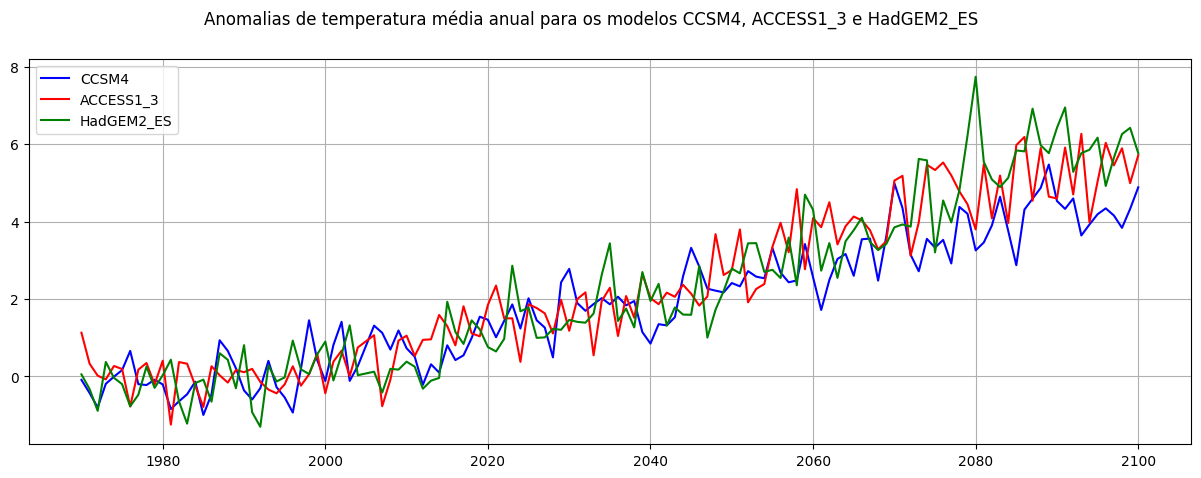

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Cria um dataset para cada modelo com as anomalias históricas e futuras
CCSM4_anom = xr.merge([tas_CCSM4, tas_CCSM4_rcp85])
ACCESS1_3_anom = xr.merge([tas_ACCESS1_3, tas_ACCESS1_3_rcp85])
HadGEM2_ES_anom = xr.merge([tas_HadGEM2_ES, tas_HadGEM2_ES_rcp85])

# Cria um dataset para cada modelo com o desvio padrão histórico e futuro
CCSM4_std = xr.merge([std_CCMS4, std_CCSM4_rcp85])
ACCESS1_3_std = xr.merge([std_ACCESS1_3, std_ACCESS1_3_rcp85])
HadGEM2_ES_std = xr.merge([std_HadGEM2_ES, std_HadGEM2_ES_rcp85])

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(CCSM4_anom.year, CCSM4_anom.tas, color='blue', label='CCSM4')
#ax.fill_between(CCSM4_anom.year, CCSM4_anom.tas - 2*CCSM4_std.tas, CCSM4_anom.tas + 2*CCSM4_std.tas, color='blue', alpha=0.3)

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(ACCESS1_3_anom.year, ACCESS1_3_anom.tas, color='red', label='ACCESS1_3')
#ax.fill_between(ACCESS1_3_anom.year, ACCESS1_3_anom.tas - 2*ACCESS1_3_std.tas, ACCESS1_3_anom.tas + 2*ACCESS1_3_std.tas, color='red', alpha=0.3)

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(HadGEM2_ES_anom.year, HadGEM2_ES_anom.tas, color='green', label='HadGEM2_ES')
#ax.fill_between(HadGEM2_ES_anom.year, HadGEM2_ES_anom.tas - 2*HadGEM2_ES_std.tas, HadGEM2_ES_anom.tas + 2*HadGEM2_ES_std.tas, color='green', alpha=0.3)

# Adiciona um título geral para a figura
fig.suptitle('Anomalias de temperatura média anual para os modelos CCSM4, ACCESS1_3 e HadGEM2_ES')

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()


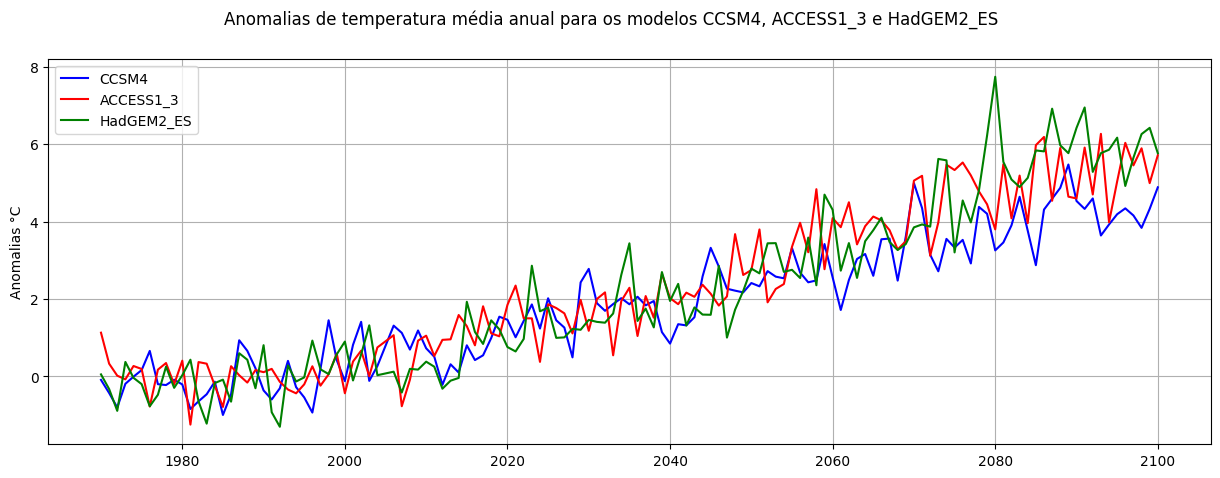

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Cria um dataset para cada modelo com as anomalias históricas e futuras
CCSM4_anom_45 = xr.merge([tas_CCSM4, tas_CCSM4_rcp45])
ACCESS1_3_anom_45 = xr.merge([tas_ACCESS1_3, tas_ACCESS1_3_rcp45])
HadGEM2_ES_anom_45 = xr.merge([tas_HadGEM2_ES, tas_HadGEM2_ES_rcp45])

# Cria um dataset para cada modelo com o desvio padrão histórico e futuro
CCSM4_std_45 = xr.merge([std_CCMS4, std_CCSM4_rcp45])
ACCESS1_3_std_45 = xr.merge([std_ACCESS1_3, std_ACCESS1_3_rcp45])
HadGEM2_ES_std_45 = xr.merge([std_HadGEM2_ES, std_HadGEM2_ES_rcp45])

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(CCSM4_anom.year, CCSM4_anom.tas, color='blue', label='CCSM4')
#ax.fill_between(CCSM4_anom.year, CCSM4_anom.tas - 2*CCSM4_std.tas, CCSM4_anom.tas + 2*CCSM4_std.tas, color='blue', alpha=0.3)

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(ACCESS1_3_anom.year, ACCESS1_3_anom.tas, color='red', label='ACCESS1_3')
#ax.fill_between(ACCESS1_3_anom.year, ACCESS1_3_anom.tas - 2*ACCESS1_3_std.tas, ACCESS1_3_anom.tas + 2*ACCESS1_3_std.tas, color='red', alpha=0.3)

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(HadGEM2_ES_anom.year, HadGEM2_ES_anom.tas, color='green', label='HadGEM2_ES')
#ax.fill_between(HadGEM2_ES_anom.year, HadGEM2_ES_anom.tas - 2*HadGEM2_ES_std.tas, HadGEM2_ES_anom.tas + 2*HadGEM2_ES_std.tas, color='green', alpha=0.3)

# Adiciona um título geral para a figura
fig.suptitle('Anomalias de temperatura média anual para os modelos CCSM4, ACCESS1_3 e HadGEM2_ES')

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()


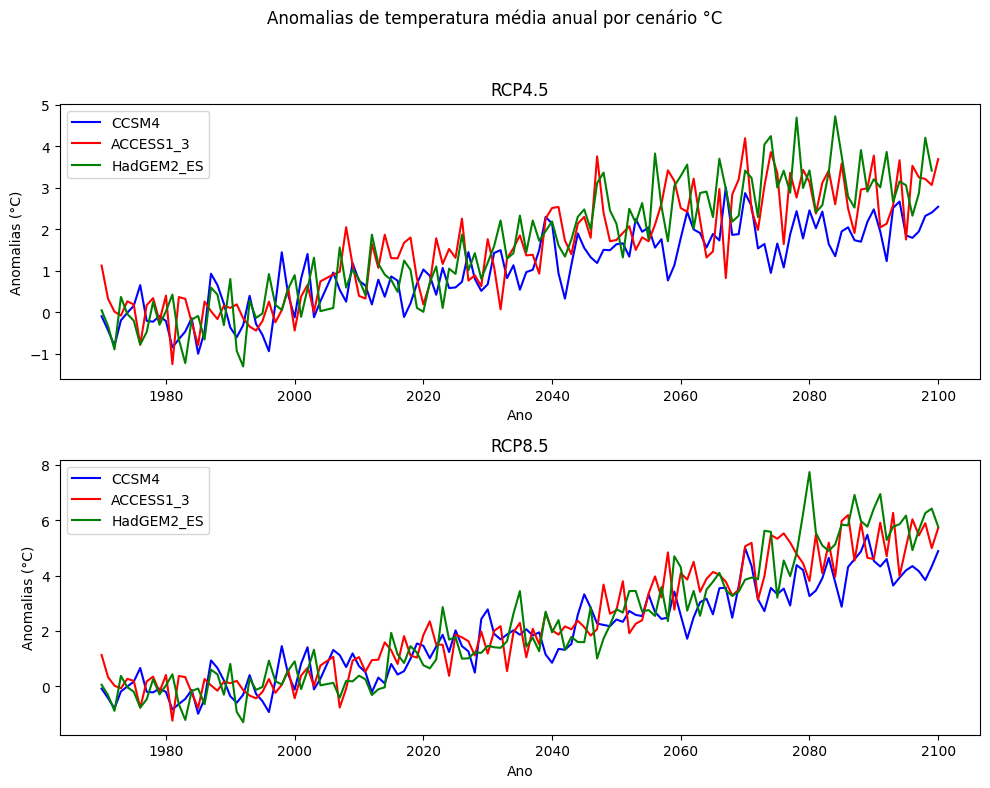

In [ ]:
import matplotlib.pyplot as plt

# Cria um dataset para cada modelo com as anomalias históricas e futuras
CCSM4_anom_45 = xr.merge([tas_CCSM4, tas_CCSM4_rcp45])
ACCESS1_3_anom_45 = xr.merge([tas_ACCESS1_3, tas_ACCESS1_3_rcp45])
HadGEM2_ES_anom_45 = xr.merge([tas_HadGEM2_ES, tas_HadGEM2_ES_rcp45])

# Cria um dataset para cada modelo com o desvio padrão histórico e futuro
CCSM4_std_45 = xr.merge([std_CCMS4, std_CCSM4_rcp45])
ACCESS1_3_std_45 = xr.merge([std_ACCESS1_3, std_ACCESS1_3_rcp45])
HadGEM2_ES_std_45 = xr.merge([std_HadGEM2_ES, std_HadGEM2_ES_rcp45])

# Cria um dataset para cada modelo com as anomalias históricas e futuras
CCSM4_anom_85 = xr.merge([tas_CCSM4, tas_CCSM4_rcp85])
ACCESS1_3_anom_85 = xr.merge([tas_ACCESS1_3, tas_ACCESS1_3_rcp85])
HadGEM2_ES_anom_85 = xr.merge([tas_HadGEM2_ES, tas_HadGEM2_ES_rcp85])

# Cria um dataset para cada modelo com o desvio padrão histórico e futuro
CCSM4_std_85 = xr.merge([std_CCMS4, std_CCSM4_rcp85])
ACCESS1_3_std = xr.merge([std_ACCESS1_3, std_ACCESS1_3_rcp85])
HadGEM2_ES_std = xr.merge([std_HadGEM2_ES, std_HadGEM2_ES_rcp85])

# Criação da figura e dos eixos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# RCP4.5 (painel da esquerda)
axs[0].plot(CCSM4_anom_45.year, CCSM4_anom_45.tas, label='CCSM4', color='blue')
axs[0].plot(ACCESS1_3_anom_45.year, ACCESS1_3_anom_45.tas, label='ACCESS1_3', color='red')
axs[0].plot(HadGEM2_ES_anom_45.year, HadGEM2_ES_anom_45.tas, label='HadGEM2_ES', color='green')
axs[0].set_title("RCP4.5")
axs[0].set_xlabel("Ano")
axs[0].set_ylabel("Anomalias (°C)")
axs[0].legend()

# RCP8.5 (painel da direita)
axs[1].plot(CCSM4_anom_85.year, CCSM4_anom_85.tas, label='CCSM4', color='blue')
axs[1].plot(ACCESS1_3_anom_85.year, ACCESS1_3_anom_85.tas, label='ACCESS1_3', color='red')
axs[1].plot(HadGEM2_ES_anom_85.year, HadGEM2_ES_anom_85.tas, label='HadGEM2_ES', color='green')
axs[1].set_title("RCP8.5")
axs[1].set_xlabel("Ano")
axs[1].set_ylabel("Anomalias (°C)")
axs[1].legend()

# Título geral e ajustes
plt.suptitle("Anomalias de temperatura média anual por cenário °C")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta o espaço para o título
plt.show()

In [ ]:

import os

# Define o diretório de saída no Drive
output_anomalias_dir = '/content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros'

# Cria o diretório se ele não existir
if not os.path.exists(output_anomalias_dir):
    os.makedirs(output_anomalias_dir)

# Lista de datasets de anomalias para salvar
anomalias_datasets_to_save = {
    "CCSM4_anom_temp_rcp45": CCSM4_anom_45,
    "ACCESS1_3_anom_temp_rcp45": ACCESS1_3_anom_45,
    "HadGEM2_ES_anom_temp_rcp45": HadGEM2_ES_anom_45,
    "CCSM4_anom_temp_rcp85": CCSM4_anom_85,
    "ACCESS1_3_anom_temp_rcp85": ACCESS1_3_anom_85,
    "HadGEM2_ES_anom_temp_rcp85": HadGEM2_ES_anom_85,
}

# Salva cada dataset de anomalia como um arquivo netCDF
for name, dataset in anomalias_datasets_to_save.items():
    output_path = os.path.join(output_anomalias_dir, f'{name}.nc')
    dataset.to_netcdf(output_path)
    print(f'Dataset {name} salvo em: {output_path}')

Dataset CCSM4_anom_temp_rcp45 salvo em: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/CCSM4_anom_temp_rcp45.nc
Dataset ACCESS1_3_anom_temp_rcp45 salvo em: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/ACCESS1_3_anom_temp_rcp45.nc
Dataset HadGEM2_ES_anom_temp_rcp45 salvo em: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/HadGEM2_ES_anom_temp_rcp45.nc
Dataset CCSM4_anom_temp_rcp85 salvo em: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/CCSM4_anom_temp_rcp85.nc
Dataset ACCESS1_3_anom_temp_rcp85 salvo em: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/ACCESS1_3_anom_temp_rcp85.nc
Dataset HadGEM2_ES_anom_temp_rcp85 salvo em: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/HadGEM2_ES_anom_temp_rcp85.nc


In [ ]:
CCSM4_anom_45

<xarray.Dataset> Size: 2kB
Dimensions:  (year: 130)
Coordinates:
  * year     (year) int64 1kB 1970 1971 1972 1973 1974 ... 2097 2098 2099 2100
Data variables:
    tas      (year) float32 520B -0.09226 -0.431 -0.805 ... 2.324 2.404 2.545

#Análise 2010-2030

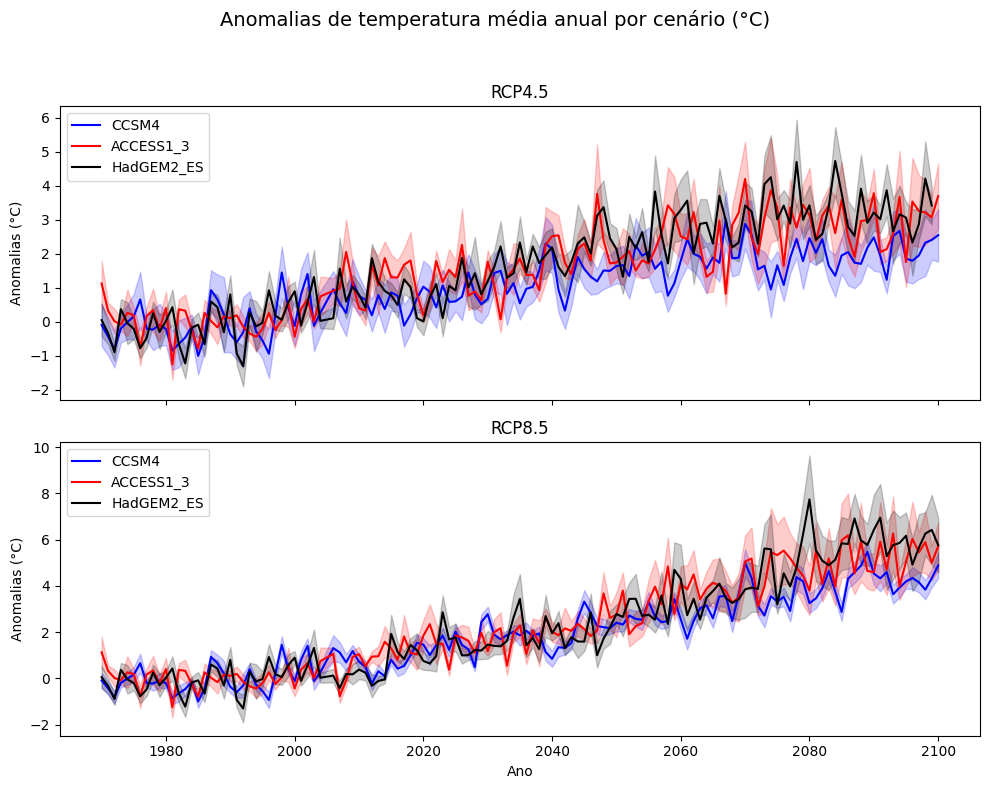

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Criação da figura e dos eixos
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# RCP4.5
axs[0].plot(CCSM4_anom_45.year, CCSM4_anom_45.tas, label='CCSM4', color='blue')
axs[0].fill_between(CCSM4_anom_45.year,
                    CCSM4_anom_45.tas - 2*CCSM4_std_45.tas,
                    CCSM4_anom_45.tas + 2*CCSM4_std_45.tas,
                    color='blue', alpha=0.2)

axs[0].plot(ACCESS1_3_anom_45.year, ACCESS1_3_anom_45.tas, label='ACCESS1_3', color='red')
axs[0].fill_between(ACCESS1_3_anom_45.year,
                    ACCESS1_3_anom_45.tas - 2*ACCESS1_3_std_45.tas,
                    ACCESS1_3_anom_45.tas + 2*ACCESS1_3_std_45.tas,
                    color='red', alpha=0.2)

axs[0].plot(HadGEM2_ES_anom_45.year, HadGEM2_ES_anom_45.tas, label='HadGEM2_ES', color='black')
axs[0].fill_between(HadGEM2_ES_anom_45.year,
                    HadGEM2_ES_anom_45.tas - 2*HadGEM2_ES_std_45.tas,
                    HadGEM2_ES_anom_45.tas + 2*HadGEM2_ES_std_45.tas,
                    color='black', alpha=0.2)

axs[0].set_title("RCP4.5")
axs[0].set_ylabel("Anomalias (°C)")
axs[0].legend()

# RCP8.5
axs[1].plot(CCSM4_anom_85.year, CCSM4_anom_85.tas, label='CCSM4', color='blue')
axs[1].fill_between(CCSM4_anom_85.year,
                    CCSM4_anom_85.tas - CCSM4_std_85.tas,
                    CCSM4_anom_85.tas + CCSM4_std_85.tas,
                    color='blue', alpha=0.2)

axs[1].plot(ACCESS1_3_anom_85.year, ACCESS1_3_anom_85.tas, label='ACCESS1_3', color='red')
axs[1].fill_between(ACCESS1_3_anom_85.year,
                    ACCESS1_3_anom_85.tas - 2*ACCESS1_3_std.tas,
                    ACCESS1_3_anom_85.tas + 2*ACCESS1_3_std.tas,
                    color='red', alpha=0.2)

axs[1].plot(HadGEM2_ES_anom_85.year, HadGEM2_ES_anom_85.tas, label='HadGEM2_ES', color='black')
axs[1].fill_between(HadGEM2_ES_anom_85.year,
                    HadGEM2_ES_anom_85.tas - 2*HadGEM2_ES_std.tas,
                    HadGEM2_ES_anom_85.tas + 2*HadGEM2_ES_std.tas,
                    color='black', alpha=0.2)

axs[1].set_title("RCP8.5")
axs[1].set_xlabel("Ano")
axs[1].set_ylabel("Anomalias (°C)")
axs[1].legend()

# Título geral e layout
plt.suptitle("Anomalias de temperatura média anual por cenário (°C)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Resto do código que fiz para a disciplina

In [ ]:
# Função para calcular média do período analisado
def calc_mean(ds, start_year, end_year):
    # Calcula a média para a região
    ds = ds.mean(dim=['latitude', 'longitude'])
    # Seleciona o período desejado
    temp_period = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    # Calcula as estatísticas
    mean_temp = temp_period.mean()
    return mean_temp.tas.values

# Função para calcular variância do período analisado
def calc_var(ds, start_year, end_year):

    # Seleciona o período desejado
    temp_period = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    # Calcula as estatísticas
    var_temp = temp_period.var().item()
    return var_temp

def remove_linear_trend(ds,  start_year, end_year , time_name='time'):
    """
    Remove a tendência linear de uma variável em um xarray Dataset.
    """
    ds = ds.mean(dim=['latitude', 'longitude'])
    temperature = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    time = temperature['time']
    # Converter tempo para números para usar na regressão linear
    time_numeric = time.astype('datetime64[s]').astype(np.float64)
    # Ajuste uma regressão linear aos dados de temperatura
    slope, intercept, _, _, _ = stats.linregress(time_numeric, temperature)
    # Calcule os valores ajustados da tendência
    trend = slope * time_numeric + intercept
    # Subtraia a tendência dos dados originais para remover a tendência
    detrended_temperature = temperature - trend + trend[0]
    detrended_temperature['time'] = temperature['time']
    return detrended_temperature

In [ ]:
# Calcula as estatísticas para os períodos especificados
mean_CCSM4 = calc_mean(CCSM4, 1975, 2004)
mean_ACCESS1_3 = calc_mean(ACCESS1_3, 1975, 2004)
mean_HadGEM2_ES = calc_mean(HadGEM2_ES, 1975, 2004)

mean_CCSM4_rcp45 = calc_mean(CCSM4_rcp45, 2010, 2030)
mean_ACCESS1_3_rcp45 = calc_mean(ACCESS1_3_rcp45, 2010, 2030)
mean_HadGEM2_ES_rcp45 = calc_mean(HadGEM2_ES_rcp45, 2010, 2030)

mean_CCSM4_rcp85 = calc_mean(CCSM4_rcp85, 2010, 2030)
mean_ACCESS1_3_rcp85 = calc_mean(ACCESS1_3_rcp85, 2010, 2030)
mean_HadGEM2_ES_rcp85 = calc_mean(HadGEM2_ES_rcp85, 2010, 2030)

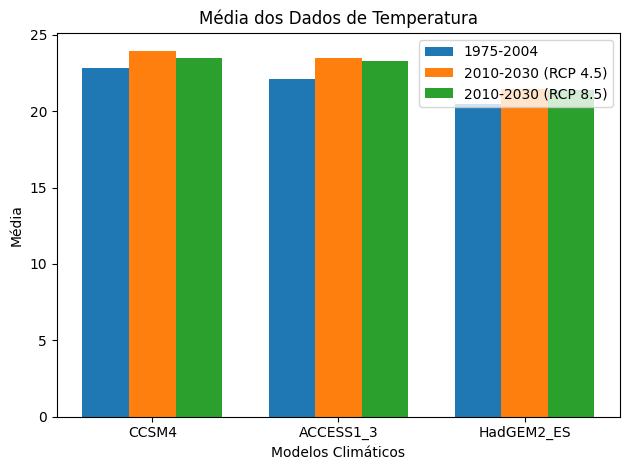

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
mean_1975_2004 = [mean_CCSM4, mean_ACCESS1_3, mean_HadGEM2_ES]
mean_2010_2030_rcp45 = [mean_CCSM4_rcp45, mean_ACCESS1_3_rcp45, mean_HadGEM2_ES_rcp45]
mean_2010_2030_rcp85 = [mean_CCSM4_rcp85, mean_ACCESS1_3_rcp85, mean_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, mean_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, mean_2010_2030_rcp85, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, mean_2010_2030_rcp45, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Média')
ax.set_title('Média dos Dados de Temperatura')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
%%capture
#Retira a tendência linear dos dados.
notrend_CCSM4 = remove_linear_trend(CCSM4, 1975, 2004)
notrend_ACCESS1_3 = remove_linear_trend(ACCESS1_3, 1975, 2004)
notrend_HadGEM2_ES = remove_linear_trend(HadGEM2_ES, 1975, 2004)

notrend_CCSM4_rcp45 = remove_linear_trend(CCSM4_rcp45, 2010, 2030)
notrend_ACCESS1_3_rcp45 = remove_linear_trend(ACCESS1_3_rcp45, 2010, 2030)
notrend_HadGEM2_ES_rcp45 = remove_linear_trend(HadGEM2_ES_rcp45, 2010, 2030)

notrend_CCSM4_rcp85 = remove_linear_trend(CCSM4_rcp85, 2010, 2030)
notrend_ACCESS1_3_rcp85 = remove_linear_trend(ACCESS1_3_rcp85, 2010, 2030)
notrend_HadGEM2_ES_rcp85 = remove_linear_trend(HadGEM2_ES_rcp85, 2010, 2030)

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_dataarray()` method.

In [ ]:
#Calcula a variância dos dados.
var_CCSM4 = calc_var(notrend_CCSM4, 1975, 2004)
var_ACCESS1_3 = calc_var(notrend_ACCESS1_3, 1975, 2004)
var_HadGEM2_ES = calc_var(notrend_HadGEM2_ES, 1975, 2004)

var_CCSM4_rcp45 = calc_var(notrend_CCSM4_rcp45, 2010, 2030)
var_ACCESS1_3_rcp45 = calc_var(notrend_ACCESS1_3_rcp45, 2010, 2030)
var_HadGEM2_ES_rcp45 = calc_var(notrend_HadGEM2_ES_rcp45, 2010, 2030)

var_CCSM4_rcp85 = calc_var(notrend_CCSM4_rcp85, 2010, 2030)
var_ACCESS1_3_rcp85 = calc_var(notrend_ACCESS1_3_rcp85, 2010, 2030)
var_HadGEM2_ES_rcp85 = calc_var(notrend_HadGEM2_ES_rcp85, 2010, 2030)

NameError: name 'notrend_CCSM4' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
variances_1975_2004 = [var_CCSM4, var_ACCESS1_3, var_HadGEM2_ES]
variances_2010_2030_rcp45 = [var_CCSM4_rcp45, var_ACCESS1_3_rcp45, var_HadGEM2_ES_rcp85]
variances_2010_2030_rcp85 = [var_CCSM4_rcp85, var_ACCESS1_3_rcp85, var_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, variances_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, variances_2010_2030_rcp45, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, variances_2010_2030_rcp85, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Variância')
ax.set_title('Variância dos Dados de Temperatura')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


NameError: name 'var_CCSM4' is not defined

In [ ]:
#Função que calcula a temperatura mais quente do ano.

def max_temp_year(ds):
  #Calcula a média para a região
  temp = ds.mean(dim=['latitude', 'longitude'])
  # 1. Agrupar por ano
  temp_por_ano = temp.groupby('time.year')
  # 2. Calcular a temperatura máxima de cada ano
  temp_max = temp_por_ano.max(dim='time')
  #Retorna a temp_max
  return temp_max

#Função que calcula a temperatura mais fria do ano.
def min_temp_year(ds):
  temp = ds
  temp = ds.mean(dim=['latitude', 'longitude'])
  # 1. Agrupar por ano
  temp_por_ano = temp.groupby('time.year')
  # 2. Calcular a temperatura máxima de cada ano
  temp_min = temp_por_ano.min(dim='time')
  #Retorna a temp_max
  return temp_min

In [ ]:
#Máximas anuais
max_CCSM4 = max_temp_year(CCSM4)
max_ACCESS1_3 = max_temp_year(ACCESS1_3)
max_HadGEM2_ES = max_temp_year(HadGEM2_ES)

max_CCSM4_rcp45 = max_temp_year(CCSM4_rcp45).sel(year=slice("2010", "2030"))
max_ACCESS1_3_rcp45 = max_temp_year(ACCESS1_3_rcp45).sel(year=slice("2010", "2030"))
max_HadGEM2_ES_rcp45 = max_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2010", "2030"))

max_CCSM4_rcp85 = max_temp_year(CCSM4_rcp85).sel(year=slice("2010", "2030"))
max_ACCESS1_3_rcp85 = max_temp_year(ACCESS1_3_rcp85).sel(year=slice("2010", "2030"))
max_HadGEM2_ES_rcp85 = max_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2010", "2030"))

#Anomalias das máximas
mean_max_CCSM4 = max_CCSM4.mean(dim='year')
mean_max_ACCESS1_3 = max_ACCESS1_3.mean(dim='year')
mean_max_HadGEM2_ES = max_HadGEM2_ES.mean(dim='year')

anom_max_CCSM4_rcp45 = max_CCSM4_rcp45 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp45 = max_ACCESS1_3_rcp45 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp45 = max_HadGEM2_ES_rcp45 - mean_max_HadGEM2_ES

anom_max_CCSM4_rcp85 = max_CCSM4_rcp85 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp85 = max_ACCESS1_3_rcp85 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp85 = max_HadGEM2_ES_rcp85 - mean_max_HadGEM2_ES


#Minimas anuais
min_CCSM4 = min_temp_year(CCSM4)
min_ACCESS1_3 = min_temp_year(ACCESS1_3)
min_HadGEM2_ES = min_temp_year(HadGEM2_ES)

min_CCSM4_rcp45 = min_temp_year(CCSM4_rcp45).sel(year=slice("2010", "2030"))
min_ACCESS1_3_rcp45 = min_temp_year(ACCESS1_3_rcp45).sel(year=slice("2010", "2030"))
min_HadGEM2_ES_rcp45 = min_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2010", "2030"))

min_CCSM4_rcp85 = min_temp_year(CCSM4_rcp85).sel(year=slice("2010", "2030"))
min_ACCESS1_3_rcp85 = min_temp_year(ACCESS1_3_rcp85).sel(year=slice("2010", "2030"))
min_HadGEM2_ES_rcp85 = min_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2010", "2030"))

#Calculo das anomalias
mean_min_CCSM4 = min_CCSM4.mean(dim='year')
mean_min_ACCESS1_3 = min_ACCESS1_3.mean(dim='year')
mean_min_HadGEM2_ES = min_HadGEM2_ES.mean(dim='year')

anom_min_CCSM4_rcp45 = min_CCSM4_rcp45 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp45 = min_ACCESS1_3_rcp45 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp45 = min_HadGEM2_ES_rcp45 - mean_min_HadGEM2_ES

anom_min_CCSM4_rcp85 = min_CCSM4_rcp85 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp85 = min_ACCESS1_3_rcp85 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp85 = min_HadGEM2_ES_rcp85 - mean_min_HadGEM2_ES

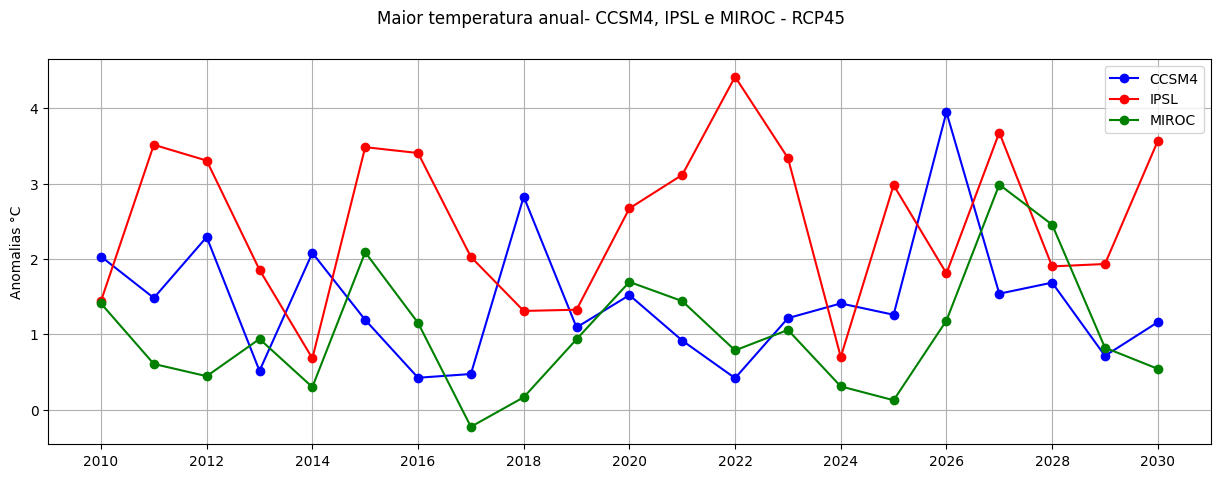

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp45.year, anom_max_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp45.year, anom_max_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp45.year, anom_max_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

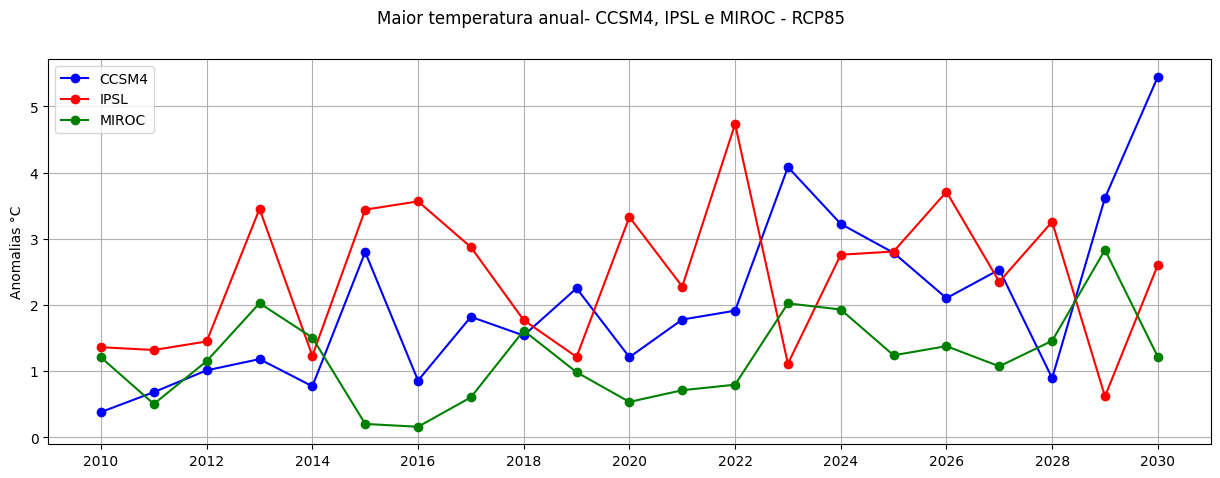

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp85.year, anom_max_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp85.year, anom_max_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp85.year, anom_max_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP85')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

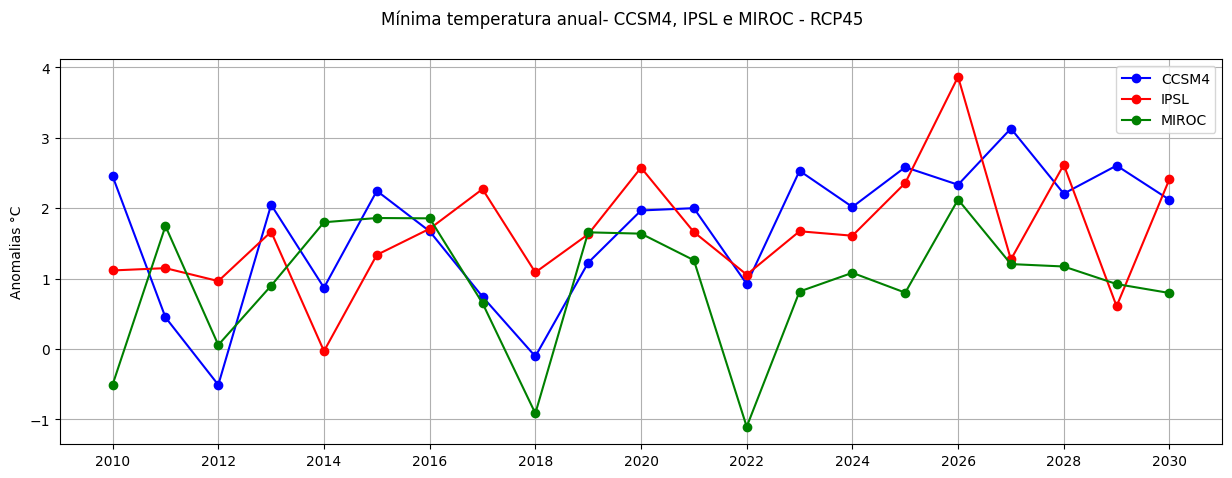

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp45.year, anom_min_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp45.year, anom_min_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp45.year, anom_min_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

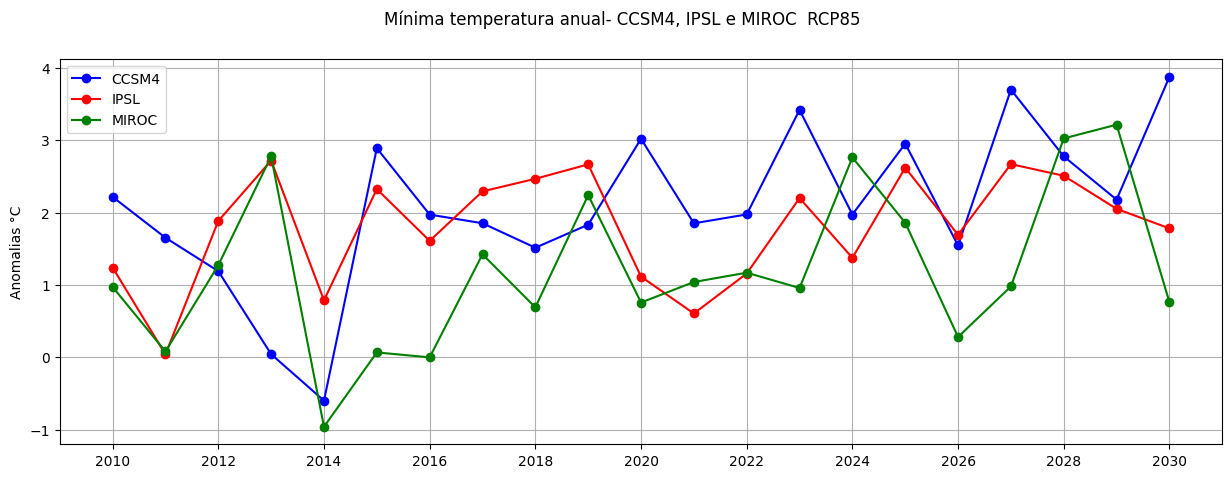

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp85.year, anom_min_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp85.year, anom_min_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp85.year, anom_min_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES  RCP85')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

#Análise 2030-2050

In [ ]:
# Calcula as estatísticas para os períodos especificados
mean_CCSM4 = calc_mean(CCSM4, 1975, 2004)
mean_ACCESS1_3 = calc_mean(ACCESS1_3, 1975, 2004)
mean_HadGEM2_ES = calc_mean(HadGEM2_ES, 1975, 2004)

mean_CCSM4_rcp45 = calc_mean(CCSM4_rcp45, 2030, 2050)
mean_ACCESS1_3_rcp45 = calc_mean(ACCESS1_3_rcp45, 2030, 2050)
mean_HadGEM2_ES_rcp45 = calc_mean(HadGEM2_ES_rcp45, 2030, 2050)

mean_CCSM4_rcp85 = calc_mean(CCSM4_rcp85, 2030, 2050)
mean_ACCESS1_3_rcp85 = calc_mean(ACCESS1_3_rcp85, 2030, 2050)
mean_HadGEM2_ES_rcp85 = calc_mean(HadGEM2_ES_rcp85, 2030, 2050)

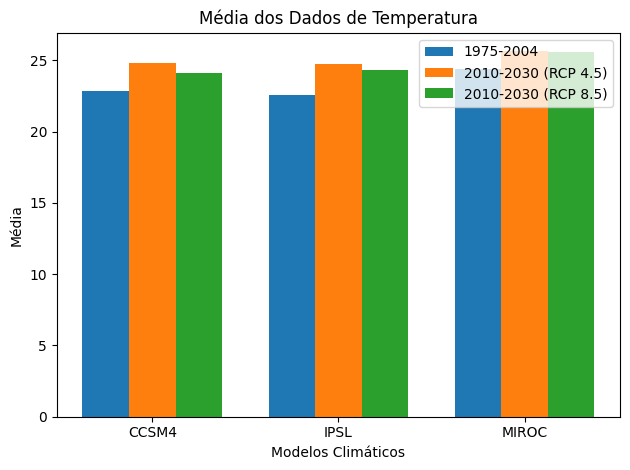

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
mean_1975_2004 = [mean_CCSM4, mean_ACCESS1_3, mean_HadGEM2_ES]
mean_2030_2050_rcp45 = [mean_CCSM4_rcp45, mean_ACCESS1_3_rcp45, mean_HadGEM2_ES_rcp45]
mean_2030_2050_rcp85 = [mean_CCSM4_rcp85, mean_ACCESS1_3_rcp85, mean_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, mean_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, mean_2030_2050_rcp85, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, mean_2030_2050_rcp45, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Média')
ax.set_title('Média dos Dados de Temperatura')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
%%capture
#Retira a tendência linear dos dados.
notrend_CCSM4 = remove_linear_trend(CCSM4, 1975, 2004)
notrend_ACCESS1_3 = remove_linear_trend(ACCESS1_3, 1975, 2004)
notrend_HadGEM2_ES = remove_linear_trend(HadGEM2_ES, 1975, 2004)

notrend_CCSM4_rcp45 = remove_linear_trend(CCSM4_rcp45, 2030, 2050)
notrend_ACCESS1_3_rcp45 = remove_linear_trend(ACCESS1_3_rcp45, 2030, 2050)
notrend_HadGEM2_ES_rcp45 = remove_linear_trend(HadGEM2_ES_rcp45, 2030, 2050)

notrend_CCSM4_rcp85 = remove_linear_trend(CCSM4_rcp85, 2030, 2050)
notrend_ACCESS1_3_rcp85 = remove_linear_trend(ACCESS1_3_rcp85, 2030, 2050)
notrend_HadGEM2_ES_rcp85 = remove_linear_trend(HadGEM2_ES_rcp85, 2030, 2050)

In [ ]:
#Calcula a variância dos dados.
var_CCSM4 = calc_var(notrend_CCSM4, 1975, 2004)
var_ACCESS1_3 = calc_var(notrend_ACCESS1_3, 1975, 2004)
var_HadGEM2_ES = calc_var(notrend_HadGEM2_ES, 1975, 2004)

var_CCSM4_rcp45 = calc_var(notrend_CCSM4_rcp45, 2030, 2050)
var_ACCESS1_3_rcp45 = calc_var(notrend_ACCESS1_3_rcp45, 2030, 2050)
var_HadGEM2_ES_rcp45 = calc_var(notrend_HadGEM2_ES_rcp45, 2030, 2050)

var_CCSM4_rcp85 = calc_var(notrend_CCSM4_rcp85, 2030, 2050)
var_ACCESS1_3_rcp85 = calc_var(notrend_ACCESS1_3_rcp85, 2030, 2050)
var_HadGEM2_ES_rcp85 = calc_var(notrend_HadGEM2_ES_rcp85, 2030, 2050)

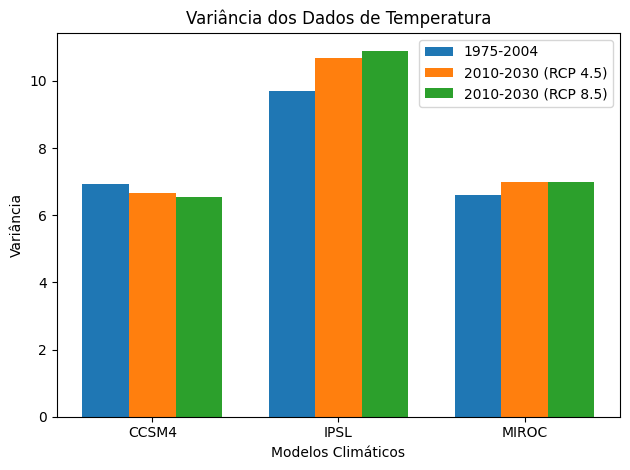

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
variances_1975_2004 = [var_CCSM4, var_ACCESS1_3, var_HadGEM2_ES]
variances_2030_2050_rcp45 = [var_CCSM4_rcp45, var_ACCESS1_3_rcp45, var_HadGEM2_ES_rcp85]
variances_2030_2050_rcp85 = [var_CCSM4_rcp85, var_ACCESS1_3_rcp85, var_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, variances_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, variances_2030_2050_rcp45, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, variances_2030_2050_rcp85, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Variância')
ax.set_title('Variância dos Dados de Temperatura')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
#Máximas anuais
max_CCSM4 = max_temp_year(CCSM4)
max_ACCESS1_3 = max_temp_year(ACCESS1_3)
max_HadGEM2_ES = max_temp_year(HadGEM2_ES)

max_CCSM4_rcp45 = max_temp_year(CCSM4_rcp45).sel(year=slice("2030", "2050"))
max_ACCESS1_3_rcp45 = max_temp_year(ACCESS1_3_rcp45).sel(year=slice("2030", "2050"))
max_HadGEM2_ES_rcp45 = max_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2030", "2050"))

max_CCSM4_rcp85 = max_temp_year(CCSM4_rcp85).sel(year=slice("2030", "2050"))
max_ACCESS1_3_rcp85 = max_temp_year(ACCESS1_3_rcp85).sel(year=slice("2030", "2050"))
max_HadGEM2_ES_rcp85 = max_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2030", "2050"))

#Anomalias das máximas
mean_max_CCSM4 = max_CCSM4.mean(dim='year')
mean_max_ACCESS1_3 = max_ACCESS1_3.mean(dim='year')
mean_max_HadGEM2_ES = max_HadGEM2_ES.mean(dim='year')

anom_max_CCSM4_rcp45 = max_CCSM4_rcp45 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp45 = max_ACCESS1_3_rcp45 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp45 = max_HadGEM2_ES_rcp45 - mean_max_HadGEM2_ES

anom_max_CCSM4_rcp85 = max_CCSM4_rcp85 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp85 = max_ACCESS1_3_rcp85 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp85 = max_HadGEM2_ES_rcp85 - mean_max_HadGEM2_ES


#Minimas anuais
min_CCSM4 = min_temp_year(CCSM4)
min_ACCESS1_3 = min_temp_year(ACCESS1_3)
min_HadGEM2_ES = min_temp_year(HadGEM2_ES)

min_CCSM4_rcp45 = min_temp_year(CCSM4_rcp45).sel(year=slice("2030", "2050"))
min_ACCESS1_3_rcp45 = min_temp_year(ACCESS1_3_rcp45).sel(year=slice("2030", "2050"))
min_HadGEM2_ES_rcp45 = min_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2030", "2050"))

min_CCSM4_rcp85 = min_temp_year(CCSM4_rcp85).sel(year=slice("2030", "2050"))
min_ACCESS1_3_rcp85 = min_temp_year(ACCESS1_3_rcp85).sel(year=slice("2030", "2050"))
min_HadGEM2_ES_rcp85 = min_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2030", "2050"))

#Calculo das anomalias
mean_min_CCSM4 = min_CCSM4.mean(dim='year')
mean_min_ACCESS1_3 = min_ACCESS1_3.mean(dim='year')
mean_min_HadGEM2_ES = min_HadGEM2_ES.mean(dim='year')

anom_min_CCSM4_rcp45 = min_CCSM4_rcp45 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp45 = min_ACCESS1_3_rcp45 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp45 = min_HadGEM2_ES_rcp45 - mean_min_HadGEM2_ES

anom_min_CCSM4_rcp85 = min_CCSM4_rcp85 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp85 = min_ACCESS1_3_rcp85 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp85 = min_HadGEM2_ES_rcp85 - mean_min_HadGEM2_ES

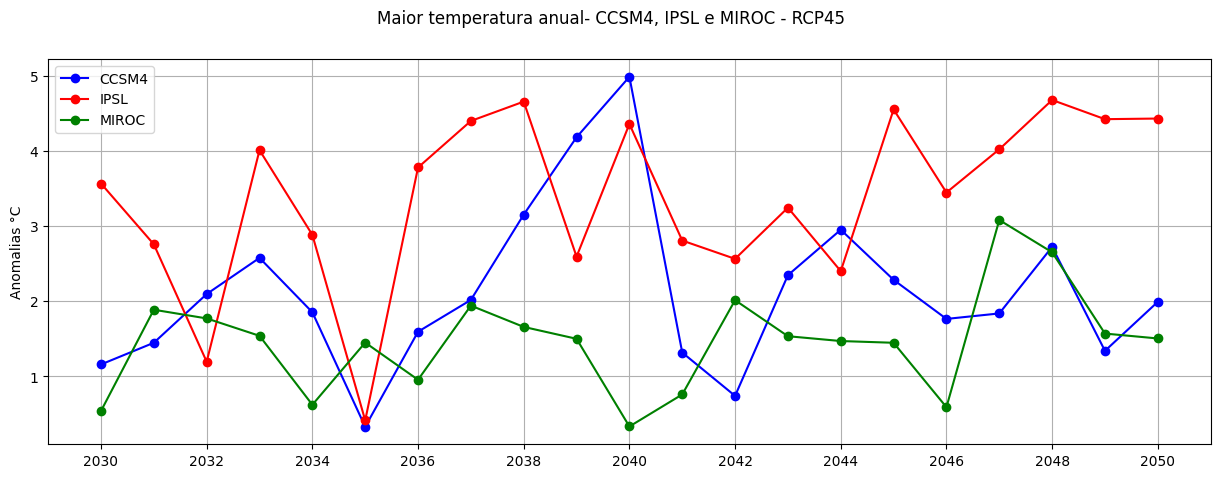

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp45.year, anom_max_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp45.year, anom_max_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp45.year, anom_max_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

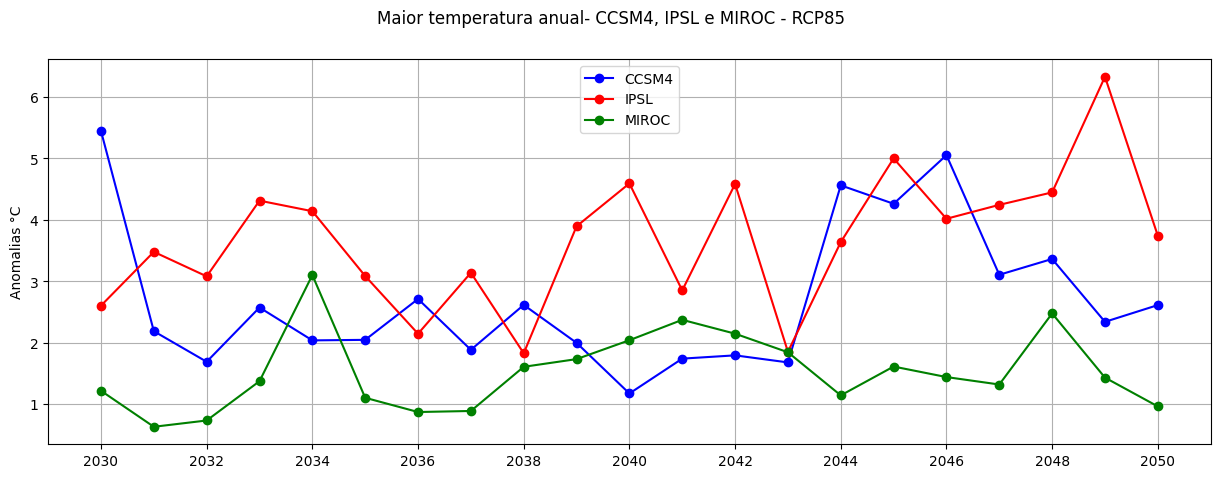

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp85.year, anom_max_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp85.year, anom_max_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp85.year, anom_max_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP85')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

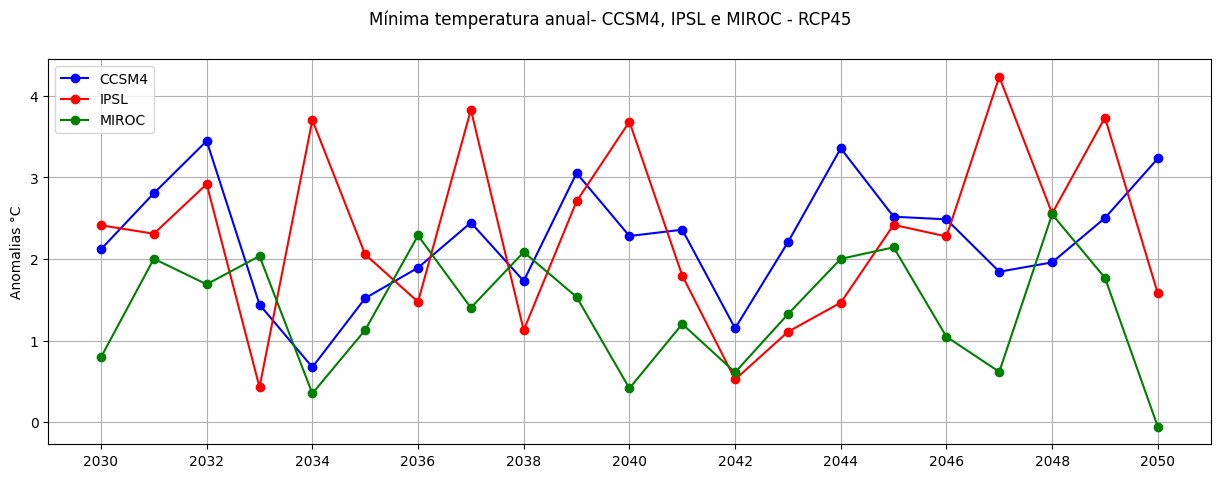

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp45.year, anom_min_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp45.year, anom_min_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp45.year, anom_min_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

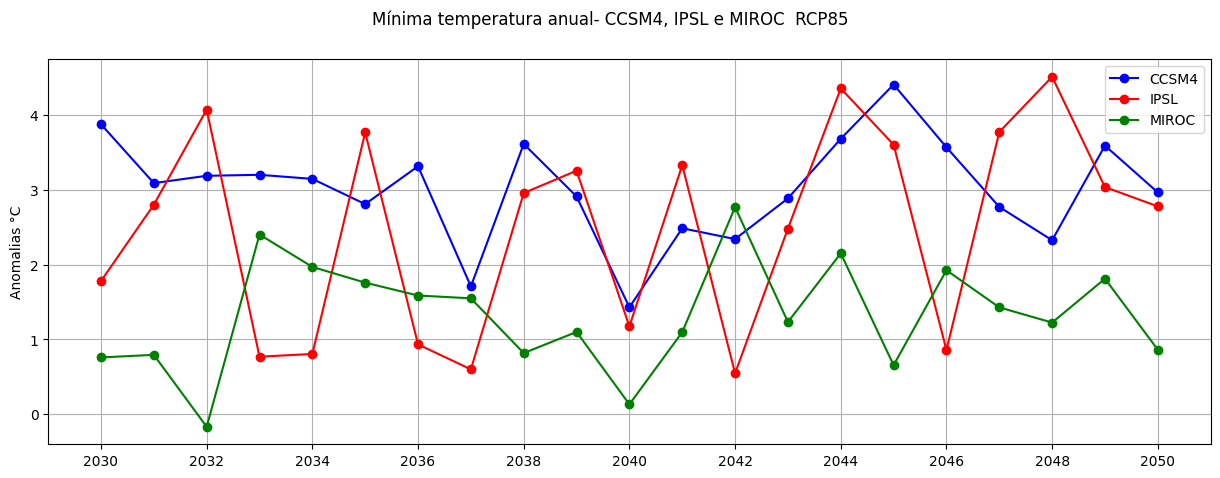

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp85.year, anom_min_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp85.year, anom_min_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp85.year, anom_min_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima temperatura anual- CCSM4, ACCESS1_3 e HadGEM2_ES  RCP85')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

#Adiciona título para o eixo y
ax.set_ylabel('Anomalias °C')

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()